<a href="https://colab.research.google.com/github/Sumit24680/MLP/blob/master/Stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Tata Motors **data**

In [108]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import math


start = datetime.datetime(2019, 8, 1)
end = datetime.datetime(2019, 9, 8)


#fetching tata motors data for around a month
df = web.DataReader("TATAMOTORS.NS", 'yahoo', start, end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,136.300003,127.550003,135.500000,129.550003,38991424,129.550003
2019-08-02,133.199997,127.000000,128.500000,130.699997,44016138,130.699997
2019-08-05,128.199997,122.300003,128.000000,123.750000,35452262,123.750000
2019-08-06,126.550003,121.750000,123.050003,122.500000,34790369,122.500000
2019-08-07,123.849998,116.500000,122.599998,117.400002,37287779,117.400002


In [109]:
# Copying the data to csv
df.to_csv("tatmotors.csv")

df = pd.read_csv("tatmotors.csv",parse_dates=True,index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,136.300003,127.550003,135.500000,129.550003,38991424,129.550003
2019-08-02,133.199997,127.000000,128.500000,130.699997,44016138,130.699997
2019-08-05,128.199997,122.300003,128.000000,123.750000,35452262,123.750000
2019-08-06,126.550003,121.750000,123.050003,122.500000,34790369,122.500000
2019-08-07,123.849998,116.500000,122.599998,117.400002,37287779,117.400002


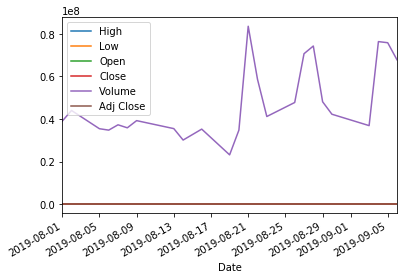

In [110]:
# Plotting the dataframe 
df.plot()

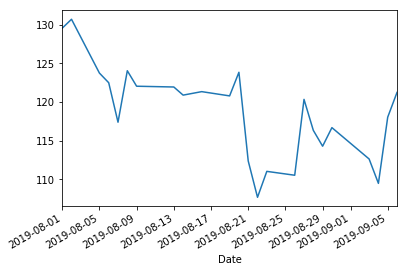

In [111]:
#Plotting adjusted close price
df["Adj Close"].plot()

In [112]:
# Drop missing value
df.fillna(value=-99999, inplace=True)

# We want to separate 20 percent of the data to forecast
forecast_out = int(math.ceil(0.2 * len(df)))

forecast_col = "Adj Close"
df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,High,Low,Open,Close,Volume,Adj Close,label
Date,,,,,,,
2019-08-01,136.300003,127.550003,135.500000,129.550003,38991424,129.550003,124.050003
2019-08-02,133.199997,127.000000,128.500000,130.699997,44016138,130.699997,122.050003
2019-08-05,128.199997,122.300003,128.000000,123.750000,35452262,123.750000,121.949997
2019-08-06,126.550003,121.750000,123.050003,122.500000,34790369,122.500000,120.900002
2019-08-07,123.849998,116.500000,122.599998,117.400002,37287779,117.400002,121.349998


In [0]:
from sklearn import preprocessing

X = np.array(df.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X_train = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(df['label'])
Y_train = y[:-forecast_out]

## **Linear Regression Plot**

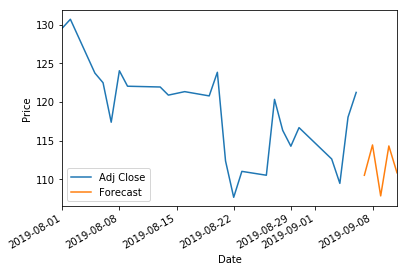

In [100]:
from sklearn.linear_model import LinearRegression


# Linear regression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

forecast_set_lreg = lreg.predict(X_lately)

dlreg = df.copy()
next_date = dlreg.iloc[-1].name

for i in forecast_set_lreg:
    next_date += datetime.timedelta(days=1)
    dlreg.loc[next_date] = [np.nan for _ in range(len(dlreg.columns)-1)]+[i]
df['Adj Close'].tail(40).plot()
dlreg['Forecast'].tail(40).plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Quadratic Regression (degree 3) Plot**

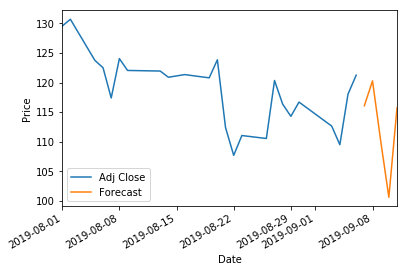

In [102]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Quadratic Regression 3
qreg3 = make_pipeline(PolynomialFeatures(3), Ridge())
qreg3.fit(X_train, Y_train)

forecast_set_qreg3 = qreg3.predict(X_lately)

dqreg3 = df.copy()
next_date = dqreg3.iloc[-1].name

for i in forecast_set_qreg3:
    next_date += datetime.timedelta(days=1)
    dqreg3.loc[next_date] = [np.nan for _ in range(len(dqreg3.columns)-1)]+[i]

df['Adj Close'].tail(40).plot()
dqreg3['Forecast'].tail(40).plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **KNN Regression Plot**

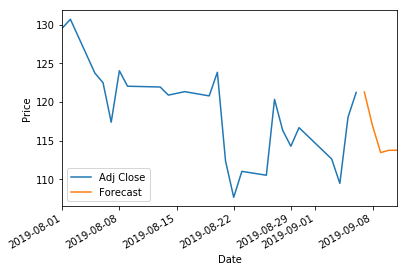

In [104]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
knnreg = KNeighborsRegressor(n_neighbors=2)
knnreg.fit(X_train, Y_train)

forecast_set_knnreg = knnreg.predict(X_lately)

dknnreg = df.copy()
next_date = dknnreg.iloc[-1].name

for i in forecast_set_knnreg:
    next_date += datetime.timedelta(days=1)
    dknnreg.loc[next_date] = [np.nan for _ in range(len(dknnreg.columns)-1)]+[i]

df['Adj Close'].tail(40).plot()
dknnreg['Forecast'].tail(40).plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Bayesian Ridge Regression Plot**

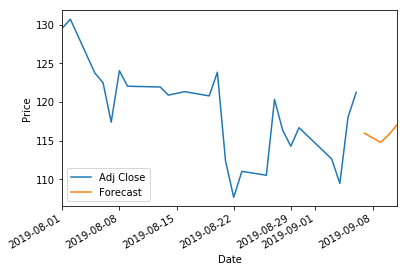

In [106]:
from sklearn import linear_model

bayreg = linear_model.BayesianRidge()
bayreg.fit(X_train, Y_train)

forecast_set_bayreg = bayreg.predict(X_lately)

dbayreg = df.copy()
next_date = dbayreg.iloc[-1].name

for i in forecast_set_bayreg:
    next_date += datetime.timedelta(days=1)
    dbayreg.loc[next_date] = [np.nan for _ in range(len(dbayreg.columns)-1)]+[i]

df['Adj Close'].tail(40).plot()
dbayreg['Forecast'].tail(40).plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()